In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [3]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)
print(partialAnswer.shape)

(631, 2)


Join train and test in total

In [4]:
total = pd.concat((train, test), axis=0)

Merge data Danceability by id

In [5]:
total.loc[total['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']

In [6]:
total.set_index('id', inplace= True)

In [7]:
total.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

In [8]:
categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

In [9]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

In [10]:
def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

In [11]:
labels = categoricalData(total, categoryList)

In [12]:
for i in categoryList:
    if i != 'Key':
        total[i] = total[i].replace(labels[i])

In [162]:
total

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Url_spotify,Comments,Channel,Composer
id,,,,,,,,,,,,,,,,,,,
0,0.0,0.000273,3.0,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,117907.000000,NaN,1.376220e+05,1.998137e+07,0.0,0.0,3070.0,0.0,NaN
1,0.0,0.184220,7.0,NaN,NaN,0.672221,0.910000,0.034966,0.746000,148.692000,173427.000000,1.848250e+05,5.190000e+03,NaN,NaN,0.0,122.0,1.0,1.0
2,0.0,NaN,6.0,-15.596000,NaN,0.667628,0.867000,0.001772,0.380000,84.899000,150667.000000,1.848250e+05,5.190000e+03,1.932081e+07,NaN,0.0,122.0,1.0,1.0
3,1.0,0.209585,NaN,-6.251000,0.027700,0.003796,NaN,0.001000,NaN,150.220000,265000.000000,2.024573e+08,9.970350e+05,3.996619e+08,0.0,1.0,24350.0,2.0,2.0
4,4.0,NaN,5.0,NaN,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,263867.000000,3.166880e+08,1.299086e+06,NaN,0.0,1.0,31150.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,NaN,0.160377,7.0,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,233721.956648,9.636781e+06,5.807853e+04,1.750041e+07,0.0,209.0,168.0,2970.0,6.0
23481,NaN,0.318585,10.0,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,NaN,138726.388393,4.572846e+07,7.227992e+04,1.365601e+07,2.0,1631.0,448.0,4731.0,7.0
23482,NaN,0.426223,5.0,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,185842.047750,-3.451740e+06,2.305163e+04,1.849094e+07,2.0,1937.0,NaN,5845.0,4.0


In [163]:
total.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify',
       'Comments', 'Channel', 'Composer'],
      dtype='object')

EXTRACT NUMERICAL DATA

In [15]:
# category = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
category = ['Key', 'Album_type', 'Composer']

In [16]:
totalNumerical = total.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

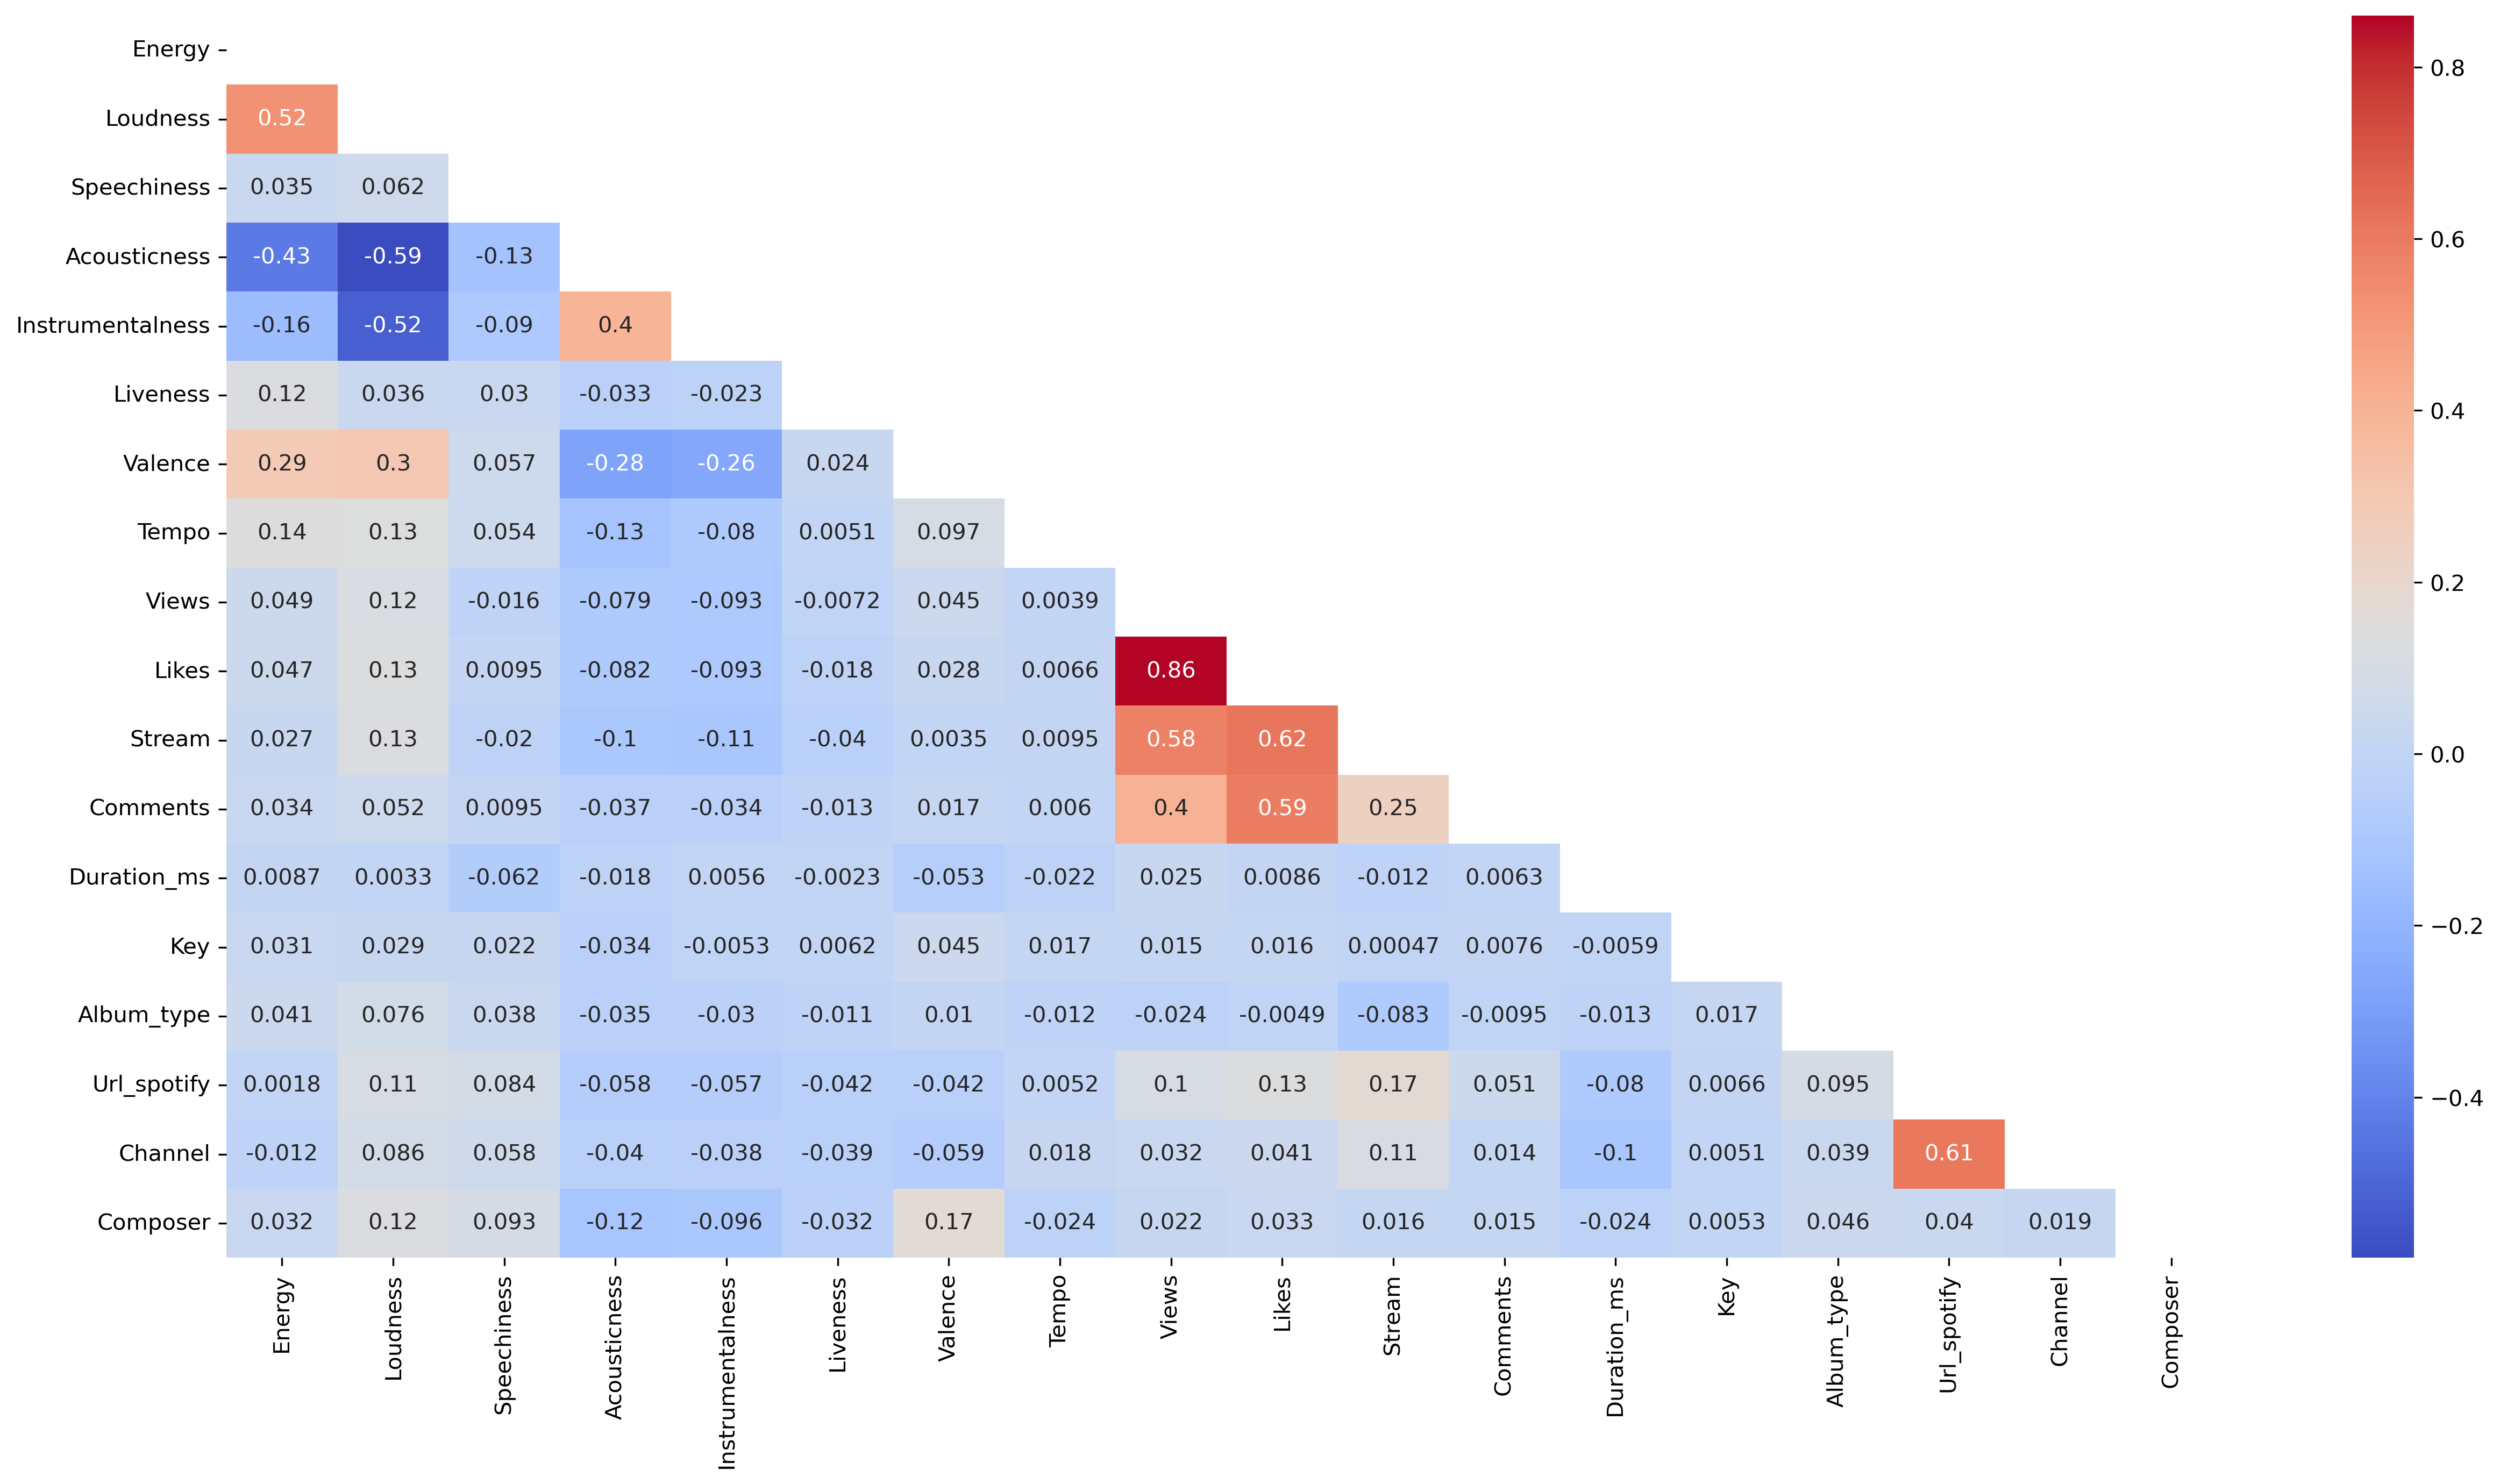

In [17]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNumerical.corr()))
dataplot = sns.heatmap(totalNumerical.corr(), cmap="coolwarm", annot=True, mask=mask)

In [18]:
totalNumerical.isnull().sum(0)

Energy              3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Views               3523
Likes               3523
Stream              3523
Comments            3523
Duration_ms         3523
Key                 3523
Album_type          3523
Url_spotify         3523
Channel             3523
Composer            3523
dtype: int64

TEST FUNCTION

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import train, Dataset, early_stopping

class testImputate():
    def __init__(self, data, listCategory) -> None:
        self.data = data.copy()
        self.listCategory = listCategory
        
    def __parameters__(self, isCategory, categories = None):
        if not isCategory:
            return {
                "objective":"regression",
                "boosting": "random_forest", 
                "num_iterations": 128,
                "max_depth": 8,
                "num_leaves": 128,
                "min_data_in_leaf": 1,
                "min_sum_hessian_in_leaf": 0.00001,
                "min_gain_to_split": 0.0,
                "bagging_fraction": 0.632,
                "feature_fraction": 1.0,
                "feature_fraction_bynode": 0.632,
                "bagging_freq": 1,
                "verbosity": -1
                }
        else:
            # return {
            #     'objective': 'multiclass',
            #     'num_class': len(categories) +1,  # Specify the number of classes
            #     'metric': 'multi_logloss',
            #     'boosting_type': 'gbdt',
            #     'num_leaves': 128,
            #     'learning_rate': 0.05,
            #     'feature_fraction': 0.9,
            #     'bagging_fraction': 0.8,
            #     'bagging_freq': 5,
            #     'verbose': -1
            #     }
            return {
                'objective': 'multiclass',
                'num_class': len(categories) +1,  # Specify the number of classes
                'metric': 'multi_logloss',
                'boosting_type': 'gbdt',
                'num_leaves': 128,
                'learning_rate': 0.001,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.8,
                'bagging_freq': 5,
                'verbose': -1
                }



    def mice(self, n=1):
        self.__getDataType__()
        for feature in self.data.columns:
            isCategory = False
            TrainTotalScaled_X, TrainTotal_y, X_predPD = self.preprocessing(feature)
            # Verify if feature is in list of categories
            cat = None
            if feature in self.listCategory:
                isCategory = True
                TrainTotal_y = TrainTotal_y.astype(int)
                cat = TrainTotal_y[feature].unique()
             
            prediction = pd.DataFrame()
            for i in range(n):
                X_train, X_validation, y_train, y_validation = self.splitDataset(TrainTotalScaled_X, TrainTotal_y, randomState = i)
                if not isCategory:
                    prediction[f'pred_{i}'] = self.__model__(X_train, X_validation, y_train, y_validation, X_predPD)
                else:
                    prediction[f'pred_{i}'] = self.__modelCat__(X_train, X_validation, y_train, y_validation, X_predPD, categories=cat)
               
            if not isCategory:
                newImpute = prediction.mean(axis=1)
                prediction['prediction'] = newImpute
                
                prediction['id'] = X_predPD.index
                prediction = prediction.set_index('id')
                
                self.data[feature].update(prediction['prediction'] )
            else:
                newImpute = prediction.mode(axis=1).iloc[:, 0]
                prediction['prediction'] = newImpute

                prediction['id'] = X_predPD.index
                prediction = prediction.set_index('id')
                
                self.data[feature].update(prediction['prediction'] )
                


    def __model__(self, X_train, X_validation, y_train, y_validation, X_predPD):
        
        
        train_data = Dataset(X_train, label=y_train)
        validation_data = Dataset(X_validation, label=y_validation)
        bst = train(self.__parameters__(False), train_data, valid_sets=[validation_data], callbacks=[early_stopping(stopping_rounds=5)])
        return bst.predict(X_predPD)



    def __modelCat__(self, X_train, X_validation, y_train, y_validation, X_predPD, categories=None):
        train_data = Dataset(X_train, label=y_train)
        validation_data = Dataset(X_validation, label=y_validation)
        bst = train(self.__parameters__(True, categories), train_data, valid_sets=[validation_data], callbacks=[early_stopping(stopping_rounds=5)])
        pred = bst.predict(X_predPD)
        y_pred = pred.argmax(axis=1)
        return y_pred


    def __getDataType__(self):
        self.dataType = {}
        for i in self.data.columns:
            self.dataType[i] = self.data[i].dtype

    def scaleData(self, data):
        scaler = StandardScaler()
        scaledData = scaler.fit_transform(data)
        scaledDataPD = pd.DataFrame(scaledData, columns=data.columns)
        return scaler, scaledDataPD
    
    def splitDataset(self, dataX, dataY, randomState = 0):
        X_train, X_validation, y_train, y_validation = train_test_split(dataX, dataY, test_size=0.2, random_state=randomState)
        return X_train, X_validation, y_train, y_validation 

    def preprocessing(self, feature):
        print(f"___ Processing {feature} ___")
        auxDataCopy = self.data.copy()
        # Delete nan data from data to predict
        featurePredict = auxDataCopy[auxDataCopy[feature].isna()]
        # Data to test model
        predictData = featurePredict.loc[:, ~featurePredict.columns.isin([feature])]
        trainData = auxDataCopy.dropna(axis=0, how="any", subset=[feature])
        # Create data to train
        TrainTotal_y = trainData.loc[:, trainData.columns.isin([feature])]
        TrainTotal_X = trainData.loc[:, ~trainData.columns.isin([feature])]
        scaler, TrainTotalScaled_X = self.scaleData(TrainTotal_X)

        # Fixed ID
        TrainTotalScaled_X['id'] = TrainTotal_y.index
        TrainTotalScaled_X = TrainTotalScaled_X.set_index('id')

        # Prediceted Data Scaler
        X_pred =  scaler.transform(predictData)
        X_predPD = pd.DataFrame(X_pred, columns=predictData.columns)

        X_predPD['id'] = predictData.index
        X_predPD = X_predPD.set_index('id')

        return TrainTotalScaled_X, TrainTotal_y, X_predPD
    
    def plotCorrelation(self):
        fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
        mask = np.triu(np.ones_like(self.data.corr()))
        sns.heatmap(self.data.corr(), cmap="coolwarm", annot=True, mask=mask)
        


        

        

In [51]:
t = testImputate(totalNumerical, category)
t.mice(10)


___ Processing Energy ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.0307979


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's l2: 0.0313514


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 0.0308179
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.0314978
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[32]	valid_0's l2: 0.0320845
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 0.0330452
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0308043
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's l2: 0.0309323


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's l2: 0.0306489
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0308605
___ Processing Loudness ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 6.94961
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 6.65991


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's l2: 7.0667
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 7.26274
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[63]	valid_0's l2: 6.91785
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 6.86022
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[37]	valid_0's l2: 6.58925
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 6.9779
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[27]	valid_0's l2: 6.89844
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 6.92912
___ Processing Speechiness ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's l2: 0.00832505


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 0.00850489
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 0.00811323
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.00823601
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[16]	valid_0's l2: 0.00833198
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[47]	valid_0's l2: 0.00784431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 0.00831643
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 0.00862253
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's l2: 0.00766586


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 0.00808464
___ Processing Acousticness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's l2: 0.024199
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[33]	valid_0's l2: 0.0242209
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0243873


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0245449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 0.0242522
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 0.0233708


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 0.0251513
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[31]	valid_0's l2: 0.0240884
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0253878
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[13]	valid_0's l2: 0.0244218
___ Processing Instrumentalness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0233078
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0229455
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 0.02515
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[23]	valid_0's l2: 0.0228807
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.0240522
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[16]	valid_0's l2: 0.0260702
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[42]	valid_0's l2: 0.0249988
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's l2: 0.0248913
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[30]	valid_0's l2: 0.0246058
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0238179
___ Processing Liveness ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[19]	valid_0's l2: 0.0123437
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 0.0128594
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 0.010331
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's l2: 0.0123396


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[21]	valid_0's l2: 0.0116555
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.0110166
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[43]	valid_0's l2: 0.0108565
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 0.0111172
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[28]	valid_0's l2: 0.0102496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's l2: 0.0107632


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


___ Processing Valence ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[36]	valid_0's l2: 0.0437137
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[52]	valid_0's l2: 0.0432077
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 0.0454715
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[25]	valid_0's l2: 0.0442907
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's l2: 0.0445036


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's l2: 0.0448384
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[52]	valid_0's l2: 0.0450819
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 0.0454915
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[17]	valid_0's l2: 0.045618
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 0.0442065
___ Processing Tempo ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's l2: 871.979


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's l2: 853.614
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 836.066


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's l2: 820.706
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[30]	valid_0's l2: 809.529
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 851.347
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[39]	valid_0's l2: 838.136
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's l2: 825.61


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's l2: 818.708
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 828.739
___ Processing Views ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 2.23623e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 2.20907e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 2.06914e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 1.3729e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 2.05101e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iteratio

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's l2: 1.86895e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 2.48011e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 2.02968e+16


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's l2: 1.91562e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 1.68806e+16
___ Processing Likes ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 4.87045e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[20]	valid_0's l2: 5.81168e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 5.29251e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[4]	valid_0's l2: 4.5284e+11


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 3.93711e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 5.21326e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 6.4632e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[26]	valid_0's l2: 5.06117e+11
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[17]	valid_0's l2: 3.489e+11
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[10]	valid_0's l2: 5.64772e+11
___ Processing Stream ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 2.65706e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[8]	valid_0's l2: 2.94661e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 2.39451e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[13]	valid_0's l2: 2.7111e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 2.75302e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[30]	valid_0's l2: 2.70998e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[18]	valid_0's l2: 2.97129e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[18]	valid_0's l2: 2.95352e+16
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[47]	valid_0's l2: 2.55144e+16
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[20]	valid_0's l2: 2.81171e+16
___ Processing Comments ___
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[4]	valid_0's l2: 2.96167e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's l2: 1.18102e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 6.75074e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 5.99143e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's l2: 6.31761e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 1.21821e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 2.83862e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[8]	valid_0's l2: 2.79779e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2]	valid_0's l2: 1.31579e+10
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[14]	valid_0's l2: 2.18605e+10
___ Processing Duration_ms ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 1.15211e+10


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 7.53819e+09
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[10]	valid_0's l2: 6.29587e+09


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5]	valid_0's l2: 1.23469e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's l2: 8.37931e+09


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's l2: 1.7054e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[3]	valid_0's l2: 7.24442e+09


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 1.00437e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 1.40743e+10
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 1.83509e+10
___ Processing Key ___
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.34144
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.34152
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.33893
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.33921
Training unt

c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[45]	valid_0's l2: 196033
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[74]	valid_0's l2: 195120
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[30]	valid_0's l2: 194080
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[11]	valid_0's l2: 192002
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[15]	valid_0's l2: 187083
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 188612
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[34]	valid_0's l2: 197181
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's l2: 195968
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	valid_0's l2: 199958
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 191579
___ Processing Channel ___


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[12]	valid_0's l2: 1.33374e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's l2: 1.48578e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[9]	valid_0's l2: 1.43192e+06
Training until validation scores don't improve for 5 rounds


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[21]	valid_0's l2: 1.39591e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's l2: 1.49604e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[14]	valid_0's l2: 1.42869e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[19]	valid_0's l2: 1.46668e+06
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 1.45743e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 1.39032e+06


c:\Users\Miguel\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's l2: 1.42593e+06
___ Processing Composer ___
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06273
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.05713
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06465
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.0788
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.06424
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[100

In [52]:
t.data

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
0,0.000273,-25.176000,0.044300,0.724151,0.000062,0.000807,0.340000,83.398000,2.396839e+07,1.376220e+05,1.998137e+07,3070.000000,117907.000000,3.0,0.0,0.000000,0.0,1.0
1,0.184220,-11.422731,0.131883,0.672221,0.910000,0.034966,0.746000,148.692000,1.848250e+05,5.190000e+03,3.946488e+07,122.000000,173427.000000,7.0,0.0,0.000000,1.0,1.0
2,0.037999,-15.596000,0.056296,0.667628,0.867000,0.001772,0.380000,84.899000,1.848250e+05,5.190000e+03,1.932081e+07,122.000000,150667.000000,6.0,0.0,0.000000,1.0,1.0
3,0.209585,-6.251000,0.027700,0.003796,0.011317,0.001000,0.434814,150.220000,2.024573e+08,9.970350e+05,3.996619e+08,24350.000000,265000.000000,10.0,0.0,1.000000,2.0,2.0
4,0.322082,-6.676825,0.026000,0.000003,0.000467,0.002924,0.295000,97.997000,3.166880e+08,1.299086e+06,3.008900e+08,31150.000000,263867.000000,5.0,0.0,1.000000,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,0.317692,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.000000,2970.0,6.0
23481,0.318585,-4.148566,0.073000,0.007420,0.000817,0.008843,0.614366,118.502274,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.000000,4731.0,7.0
23482,0.426223,-5.807545,0.072906,0.661708,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,105966.634712,185842.047750,5.0,2.0,1937.000000,5845.0,4.0


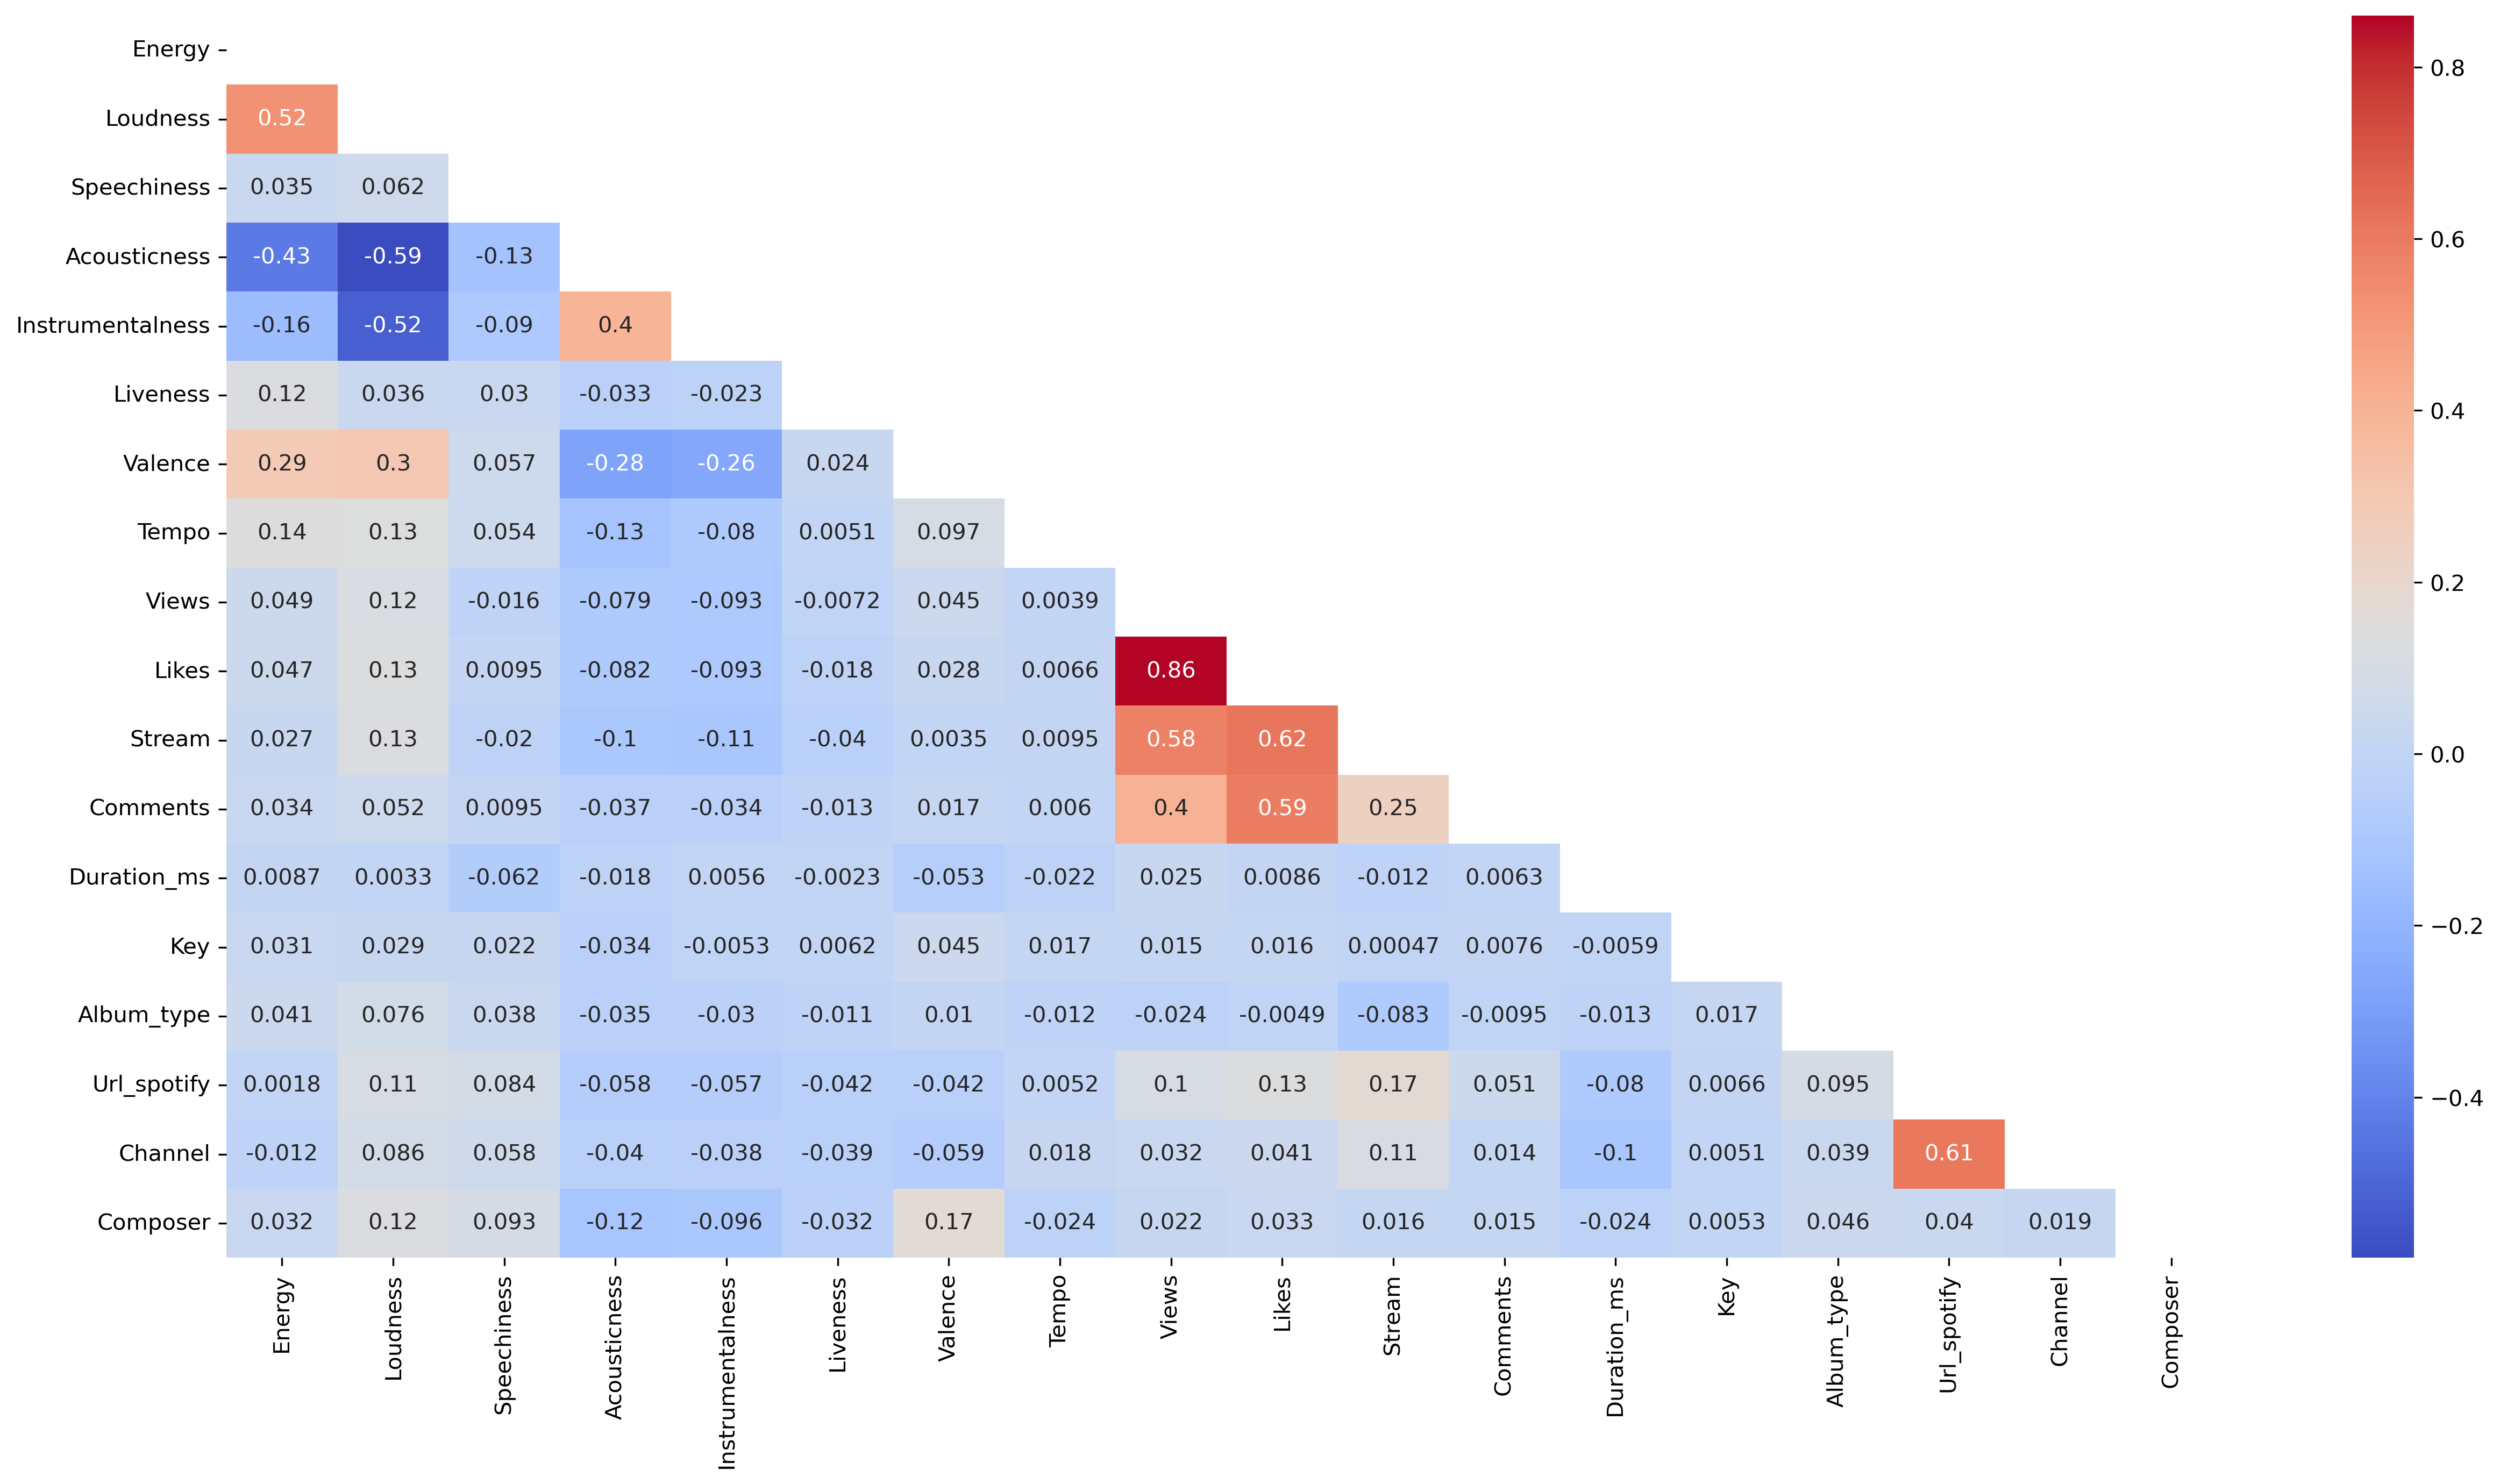

In [55]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNumerical.corr()))
dataplot = sns.heatmap(totalNumerical.corr(), cmap="coolwarm", annot=True, mask=mask)

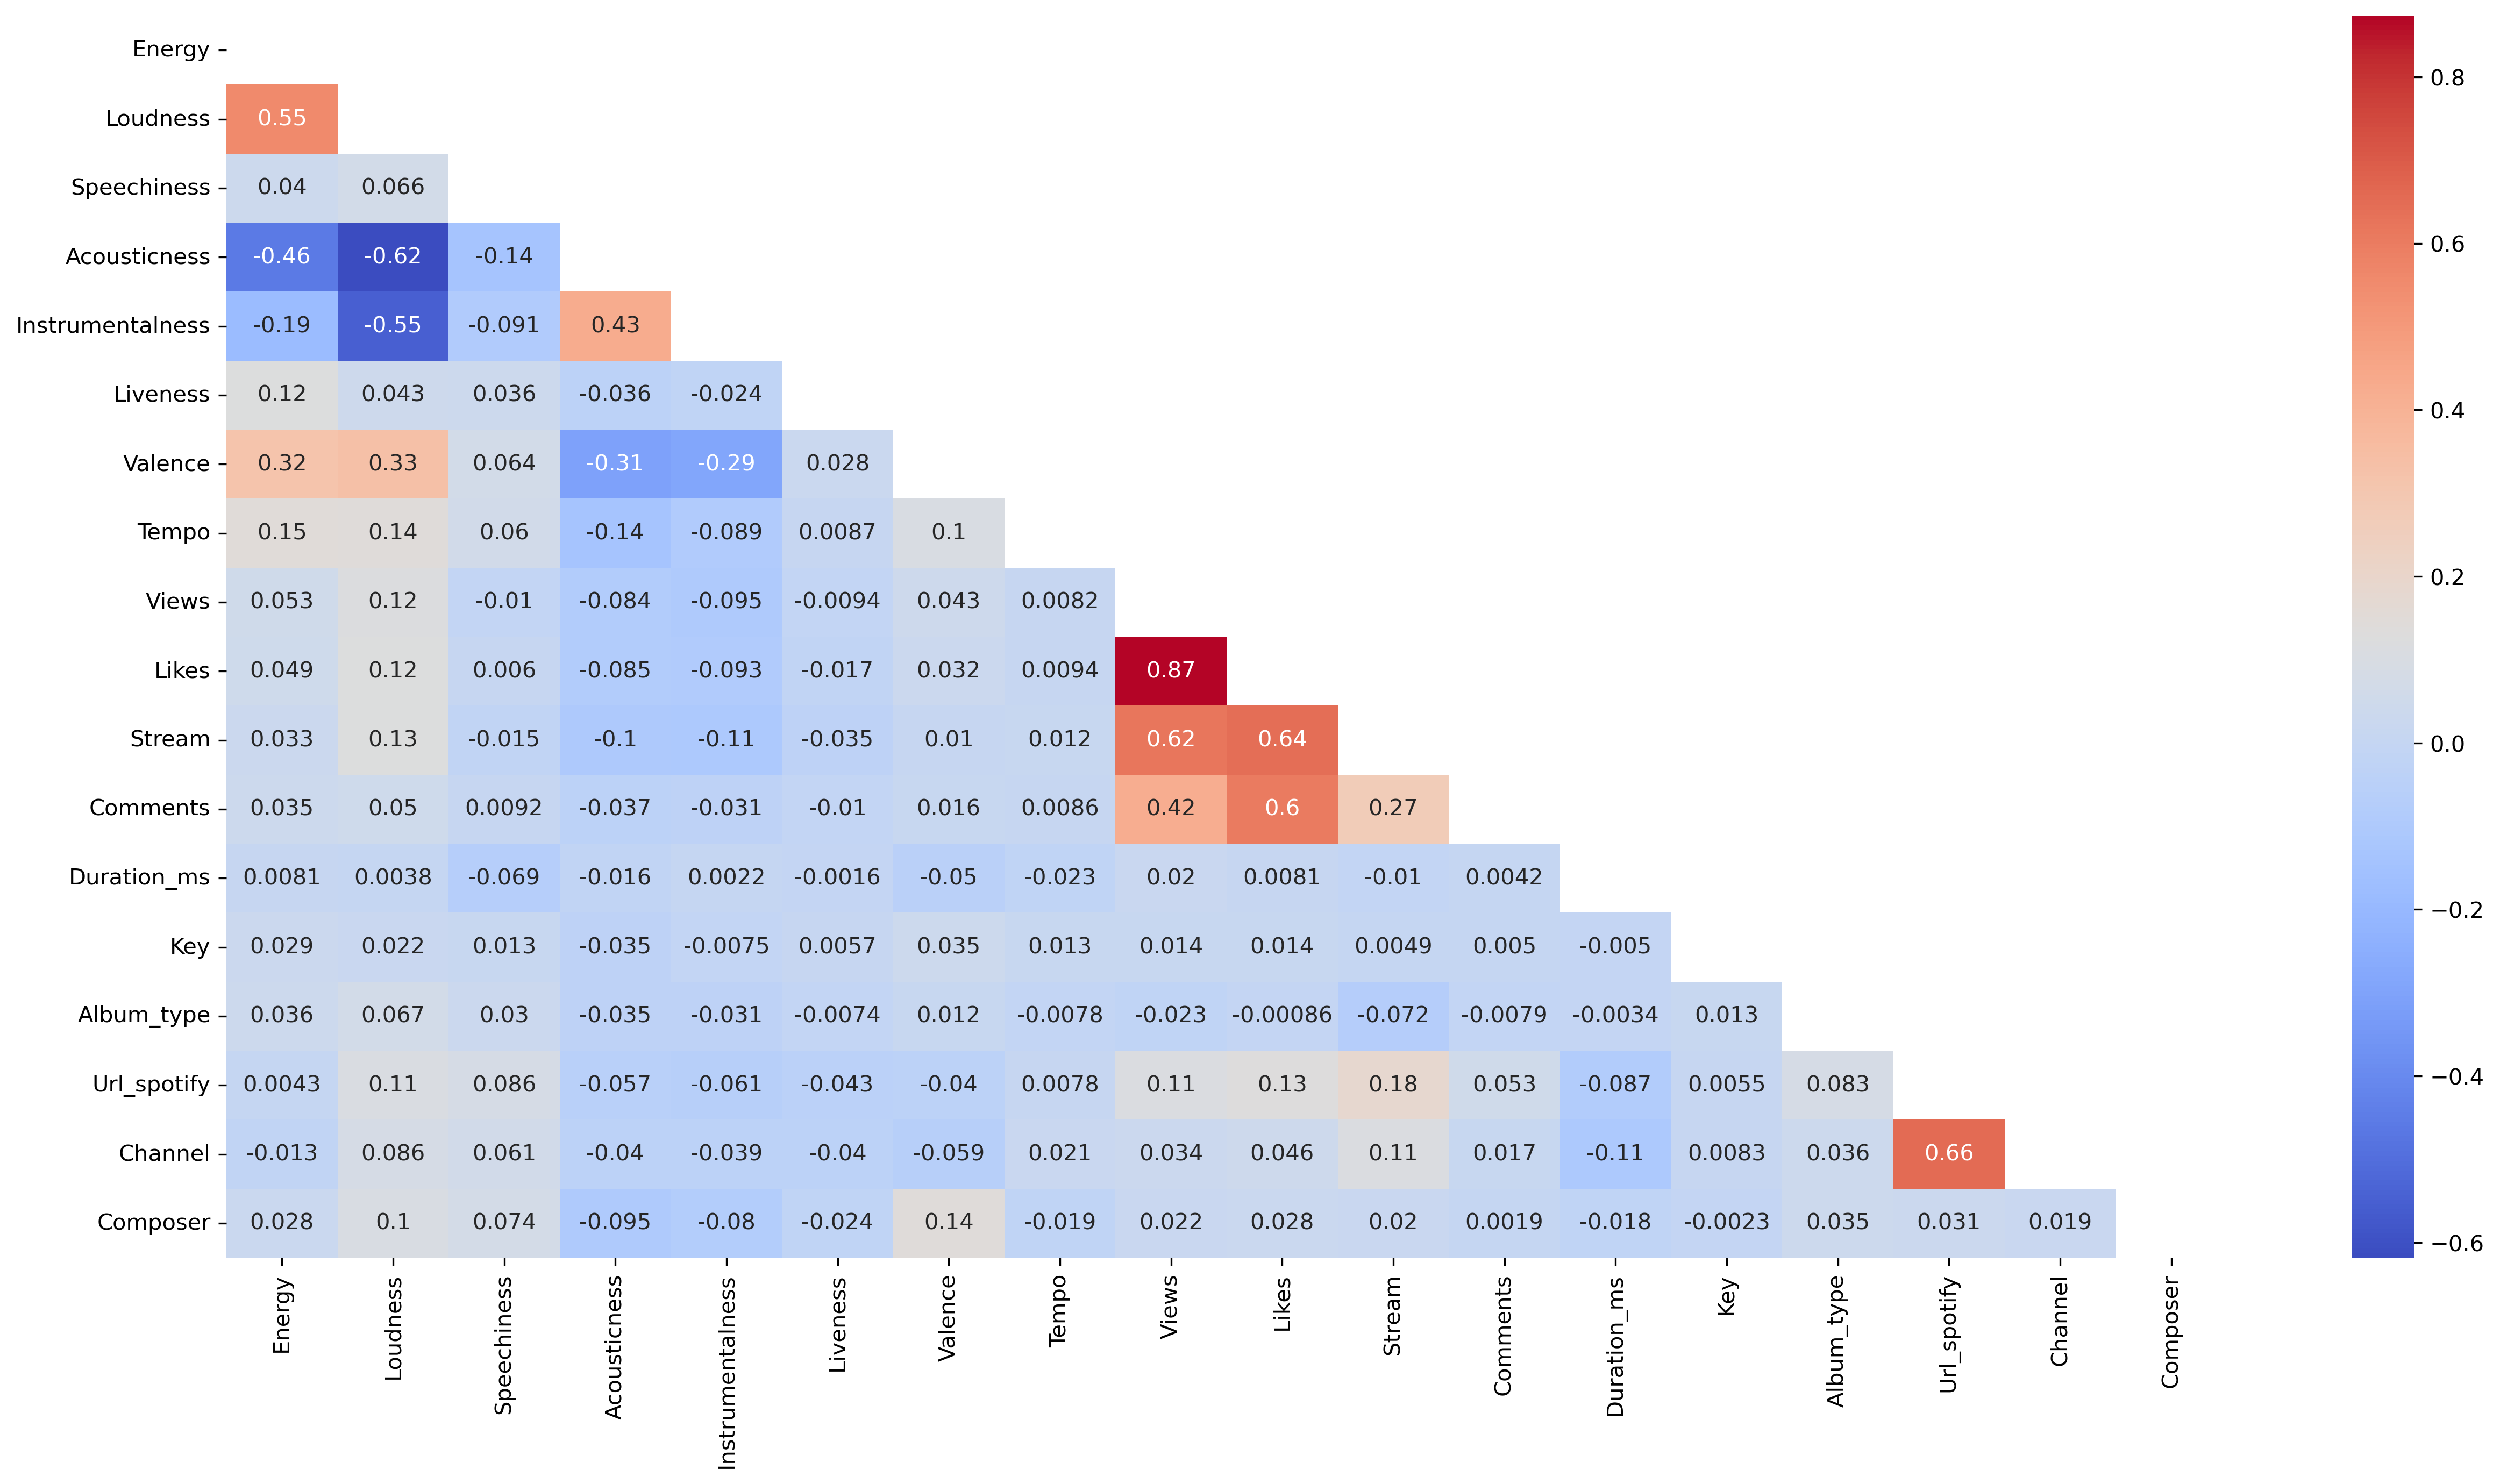

In [56]:
t.plotCorrelation()

In [182]:
t.data.isna().sum()

Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Views               0
Likes               0
Stream              0
Comments            0
dtype: int64